In [57]:
import sys, random, itertools
import chess, chess.pgn, chess.svg

import pandas as pd
import numpy as np

from math import ceil
from numpy.random import seed
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

#
sys.path.append('code/')
from aux_06 import symbol2value, list2piece

# MDP

+ start_state
+ actions
+ trans_reward
    + transition
    + reward

## `start_state`

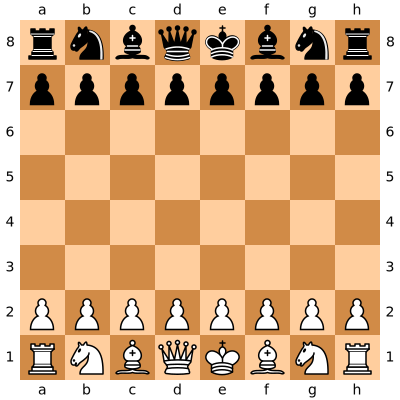

'[525, 350, 350, 1000, 10000, 350, 350, 525, 100, 100, 100, 100, 100, 100, 100, 100, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -100, -100, -100, -100, -100, -100, -100, -100, -525, -350, -350, -1000, -10000, -350, -350, -525]'

In [58]:
board = chess.Board(); display(board)

state  = symbol2value([str(board.piece_at(i)) if board.piece_at(i) != None else '.' for i in range(64) ])
repr(state)

## `actions`

Picking a (somewhat) arbitrary position:

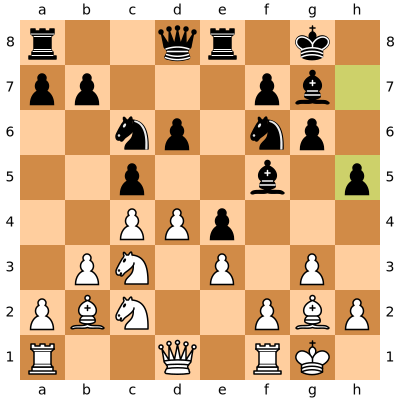

STATE:


"['R', '.', '.', 'Q', '.', 'R', 'K', '.', 'P', 'B', 'N', '.', '.', 'P', 'B', 'P', '.', 'P', 'N', '.', 'P', '.', 'P', '.', '.', '.', 'P', 'P', 'p', '.', '.', '.', '.', '.', 'p', '.', '.', 'b', '.', 'p', '.', '.', 'n', 'p', '.', 'n', 'p', '.', 'p', 'p', '.', '.', '.', 'p', 'b', '.', 'r', '.', '.', 'q', 'r', '.', 'k', '.']"



ACTIONS:


<LegalMoveGenerator at 0x7f1fad7f0cc0 (Nd5, Nb5, Nxe4, Na4, Ne2, Nb1, Bxe4, Bh3, Bf3, Bh1, Nb4, Na3, Ne1, Ba3, Bc1, Kh1, Re1, Qxh5, Qg4, Qf3, Qd3, Qe2, Qd2, Qe1, Qc1, Qb1, Rc1, Rb1, dxc5, d5, g4, b4, h3, f3, a3, h4, f4, a4)>

In [59]:
pgn = open('data/lichess_study_caruana-vs-kasparov_chapter-2_by_llNukell_2018.07.27.pgn')
game = chess.pgn.read_game(pgn)
board = game.board()

for move in [m for m in game.mainline_moves()][:24]:
     board.push(move)

display(board)

print('STATE:')
state  = [str(board.piece_at(i)) if board.piece_at(i) != None else '.' for i in range(64) ]
display(repr(state))

print('\n')

print('ACTIONS:')
display(board.legal_moves)

In [60]:
repr(board.piece_map())

"{0: Piece.from_symbol('R'), 3: Piece.from_symbol('Q'), 5: Piece.from_symbol('R'), 6: Piece.from_symbol('K'), 8: Piece.from_symbol('P'), 9: Piece.from_symbol('B'), 10: Piece.from_symbol('N'), 13: Piece.from_symbol('P'), 14: Piece.from_symbol('B'), 15: Piece.from_symbol('P'), 17: Piece.from_symbol('P'), 18: Piece.from_symbol('N'), 20: Piece.from_symbol('P'), 22: Piece.from_symbol('P'), 26: Piece.from_symbol('P'), 27: Piece.from_symbol('P'), 28: Piece.from_symbol('p'), 34: Piece.from_symbol('p'), 37: Piece.from_symbol('b'), 39: Piece.from_symbol('p'), 42: Piece.from_symbol('n'), 43: Piece.from_symbol('p'), 45: Piece.from_symbol('n'), 46: Piece.from_symbol('p'), 48: Piece.from_symbol('p'), 49: Piece.from_symbol('p'), 53: Piece.from_symbol('p'), 54: Piece.from_symbol('b'), 56: Piece.from_symbol('r'), 59: Piece.from_symbol('q'), 60: Piece.from_symbol('r'), 62: Piece.from_symbol('k')}"

In [61]:
repr(chess.SQUARE_NAMES)

"['a1', 'b1', 'c1', 'd1', 'e1', 'f1', 'g1', 'h1', 'a2', 'b2', 'c2', 'd2', 'e2', 'f2', 'g2', 'h2', 'a3', 'b3', 'c3', 'd3', 'e3', 'f3', 'g3', 'h3', 'a4', 'b4', 'c4', 'd4', 'e4', 'f4', 'g4', 'h4', 'a5', 'b5', 'c5', 'd5', 'e5', 'f5', 'g5', 'h5', 'a6', 'b6', 'c6', 'd6', 'e6', 'f6', 'g6', 'h6', 'a7', 'b7', 'c7', 'd7', 'e7', 'f7', 'g7', 'h7', 'a8', 'b8', 'c8', 'd8', 'e8', 'f8', 'g8', 'h8']"

In [62]:
repr(list2piece(state))

"['R', '.', '.', 'Q', '.', 'R', 'K', '.', 'P', 'B', 'N', '.', '.', 'P', 'B', 'P', '.', 'P', 'N', '.', 'P', '.', 'P', '.', '.', '.', 'P', 'P', 'p', '.', '.', '.', '.', '.', 'p', '.', '.', 'b', '.', 'p', '.', '.', 'n', 'p', '.', 'n', 'p', '.', 'p', 'p', '.', '.', '.', 'p', 'b', '.', 'r', '.', '.', 'q', 'r', '.', 'k', '.']"

In [63]:
repr(symbol2value([str(board.piece_at(i)) if board.piece_at(i) != None else '.' for i in range(64) ]))

'[525, 0, 0, 1000, 0, 525, 10000, 0, 100, 350, 350, 0, 0, 100, 350, 100, 0, 100, 350, 0, 100, 0, 100, 0, 0, 0, 100, 100, -100, 0, 0, 0, 0, 0, -100, 0, 0, -350, 0, -100, 0, 0, -350, -100, 0, -350, -100, 0, -100, -100, 0, 0, 0, -100, -350, 0, -525, 0, 0, -1000, -525, 0, -10000, 0]'

## `trans_reward`

### transition

### reward

In [64]:
def R(_state):
    """
    Shannon's Symmetric Evaluation
    """
    d_king = _state.count('K') - _state.count('k')
    d_queen = _state.count('Q') - _state.count('q')
    d_rook = _state.count('R') - _state.count('r')
    d_minor = (_state.count('N')+_state.count('B')) - (_state.count('n')+_state.count('b'))
    d_pawn = _state.count('P') - _state.count('p')
    
    return 200*d_king + 9*d_queen + 5*d_rook + 3*d_minor + 1*d_pawn

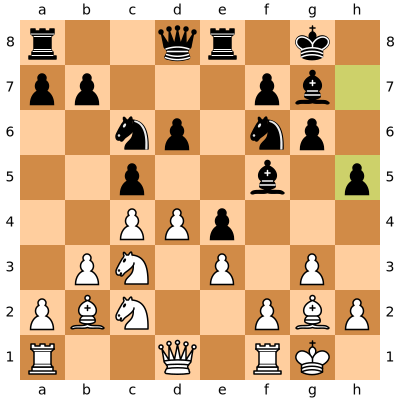

0

In [65]:
display(board)
R(state)

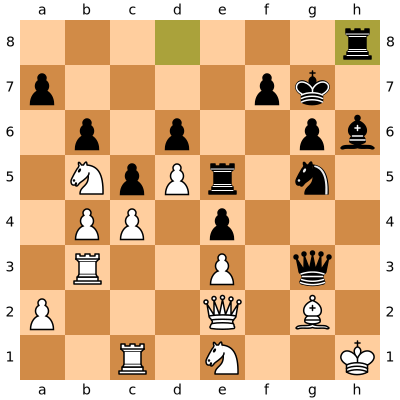

1

In [69]:
pgn = open('data/lichess_study_caruana-vs-kasparov_chapter-2_by_llNukell_2018.07.27.pgn')
game = chess.pgn.read_game(pgn)
board = game.board()
for move in [m for m in game.mainline_moves()][:62]:
     board.push(move)

display(board)

state  = [str(board.piece_at(i)) if board.piece_at(i) != None else '.' for i in range(64) ]
R(state)

In [70]:
R(state) + board.turn*0.1*len([i for i in board.legal_moves])

4.7